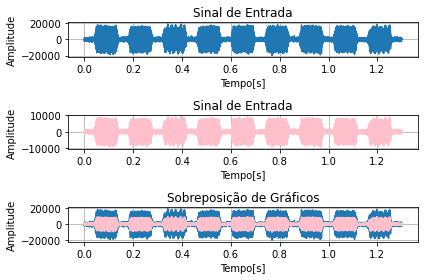

In [43]:
import numpy as np
import matplotlib.pyplot as plt 

ganho = 0.5

#Lendo arquivos binários
with open ("DTMF.pcm", "rb") as f:
        fid = f.read()
        f.close()
s = np.frombuffer(fid, dtype = "int16")

#tamanho do arquivo
tamanho = len(s)

#tempo do audio
tempo = np.arange(0, tamanho/8000, 1/8000)

#Plotando o gráfico do som original
plt.subplot(3, 1, 1)
plt.title('Sinal de Entrada')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(tempo, s)

#Calculando o ganho
sav_y = np.zeros((tamanho), dtype = "int16")
for i in range(tamanho):
    sav_y[i] = s[i] * ganho

#Plotando a Saída
plt.subplot(3, 1, 2)
plt.title('Sinal de Entrada')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(tempo, sav_y, color = 'pink') 

#Sobreposição dos gráficos
plt.subplot(3, 1, 3)
plt.title('Sobreposição de Gráficos')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(tempo, s)
plt.plot(tempo, sav_y, color = 'pink') 
plt.tight_layout()

#Salvando o arquivo de saída
with open("DTMF-AposGanho.pcm", "wb") as novo:
    for data in sav_y:
        novo.write(data)
    novo.close()